# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Loading the dataset

In [2]:
data = pd.read_csv("./marketing_campaign.csv", sep=";")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# About the dataset:
The dataset is taken from Kaggle competition "Customer Personality Analysis" that can be found [here](https://www.kaggle.com/imakash3011/customer-personality-analysis).

Data attributes:
<br><br>
**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [3]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Numeric value distributions
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**From the above output, we can conclude and note that:**

* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.
* Income values can be more than 0.5 million (which is possible)
* Year_Birth can be in the 18th century

In [5]:
# Selecting Year_Birth > 1900
data = data[data['Year_Birth'] > 1900]

In [6]:
# Selecting Income < 500000
data = data[data['Income'] < 500000]

In [7]:
print("Number of purchases by ID:")
data['ID'].value_counts().describe()

Number of purchases by ID:


count    2212.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ID, dtype: float64

**NOTE:**<br>
Dataset has only one purchase per customer ID.<br>
In other words, each record of a dataset corresponds to separate customer.<br>
And number of customers is equal to the dataset size.

In [8]:
# Removing missing values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2212


In [9]:
# Converting "Dt_Customer" strings to python datetime 
data["Date_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%Y-%m-%d")
print("Data date interval:")
data["Date_Customer"].describe()

Data date interval:


count                    2212
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Date_Customer, dtype: object

**Creating additional features**

In [10]:
#Age of customer today 
data["Age"] = 2014-data["Year_Birth"]

In [11]:
# Number of children
data['Children'] = data['Kidhome'] + data['Teenhome']

In [12]:
# Pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [13]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64


In [14]:
# Deriving living situation by marital status"Alone"
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", 
                                                    "Together":"Partner", 
                                                    "Absurd":"Alone", 
                                                    "Widow":"Alone", 
                                                    "YOLO":"Alone",
                                                    "Absurd":"Alone",
                                                    "Divorced":"Alone", 
                                                    "Single":"Alone",})

In [15]:
# Segmenting education levels in three groups
data["Education"] = data["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate", 
                                             " Graduation":"Graduate", 
                                             "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})

In [16]:
# Total members in the household
data["HouseholdSize"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [17]:
# Total amount spend
columns = ['MntWines', 'MntFruits','MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

data['TotalSpent'] = data[columns].sum(axis=1)
print("Total amount spent disctribution:")
data['TotalSpent'].describe()

Total amount spent disctribution:


count    2212.000000
mean      607.268083
std       602.513364
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: TotalSpent, dtype: float64

In [18]:
# For clarity
data = data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})

In [19]:
data.to_csv("./marketing_campaign_cleaned.csv", index=False)
df_data = data.copy()
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Date_Customer', 'Age', 'Children', 'Is_Parent', 'Living_With',
       'HouseholdSize', 'TotalSpent'],
      dtype='object')

In [20]:
# Dropping redundant columns
to_drop = ["Marital_Status", "Dt_Customer", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', "Year_Birth", "ID","Date_Customer"]
data = data.drop(to_drop, axis=1)

Next, let us look at the correlation amongst the features. 
(Excluding the categorical attributes at this point)

Correlation matrix


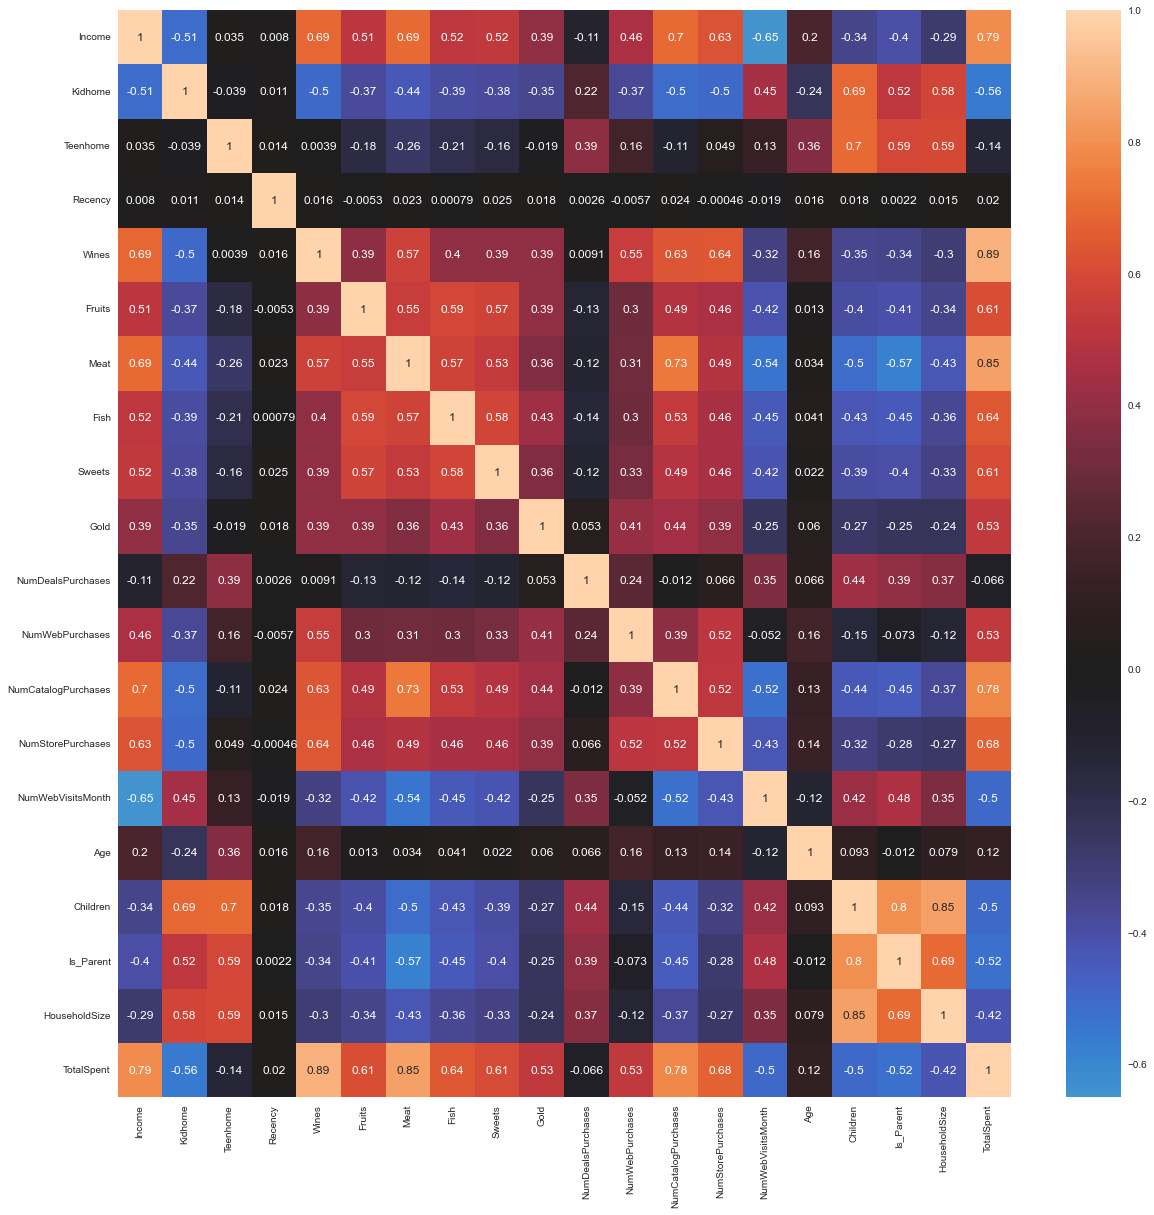

In [21]:
#correlation matrix
print("Correlation matrix")
corrmat = data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)
plt.show()

Although there are some interesting correlations,
lets see what clustering customers into groups will show.

NOTE: Some features are highly correlated. This means we need to perform dimensionality reduction.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Dimensionality reduction for clustering

In [22]:
#Get list of categorical variables
s = (data.dtypes == 'object')
categorical_columns = list(s[s].index)

print("Categorical variables in the dataset:", categorical_columns)

Categorical variables in the dataset: ['Education', 'Living_With']


In [23]:
#One-hot encode the categorical features
for column in categorical_columns:
      data[column] = data[column].apply(str)

df_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, df_dummies], axis=1)
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Children', 'Is_Parent', 'HouseholdSize', 'TotalSpent',
       'Education_Postgraduate', 'Education_Undergraduate',
       'Living_With_Partner'],
      dtype='object')

# Dimensionality reduction with PCA

In [24]:
#Scaling for dimensionality reduction
scaler = StandardScaler()
scaler.fit(data)
scaled_df = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")
print('Data shape:', scaled_df.shape)

All features are now scaled
Data shape: (2212, 23)


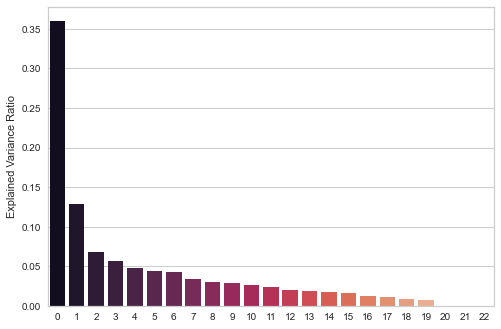

In [25]:
# PCA: explained_variance_ratio
pca = PCA()
pca.fit(scaled_df)
expl_var = pca.explained_variance_ratio_
x = list(range(expl_var.shape[0]))

sns.barplot(x=x, y=expl_var, palette="rocket")
plt.ylabel("Explained Variance Ratio")
plt.show()

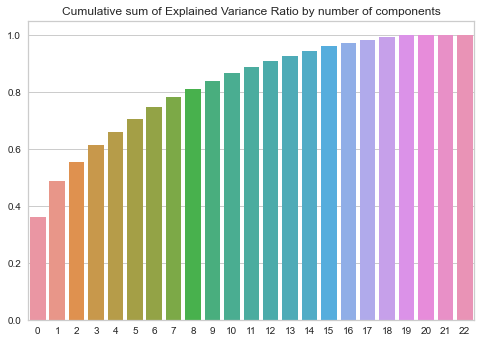

In [26]:
y = expl_var.cumsum()
sns.barplot(x=x, y=y)
plt.title("Cumulative sum of Explained Variance Ratio by number of components")
plt.show()

In [27]:
# Reducing feature space
selected_n_components = 14 #since total explained variance ratio is >85%
pca = PCA(n_components=selected_n_components)
df_red = pca.fit_transform(scaled_df)

print(df_red.shape)

(2212, 14)


# Clustering

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


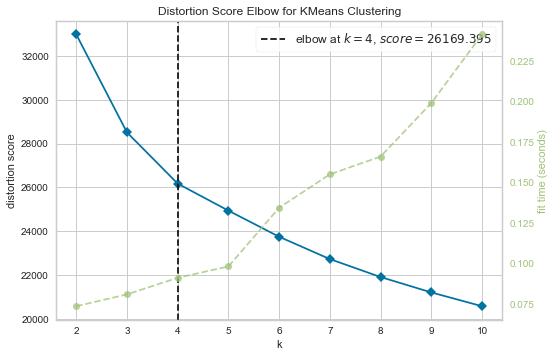

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_red)
Elbow_M.show()

**The “elbow” method shows that the optimal number of clusters is 4.**

In [29]:
n = 4
# Instantiate the clustering model
clusters = KMeans(n_clusters = n, random_state=2)
# Assign the points in the reduced dataset to clusters
C_vals = np.array(clusters.fit_predict(df_red))

In [30]:
df_data['ClusterID'] = C_vals
df_data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,Postgraduate
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
Wines,635,11,426,11,173


In [31]:
df_data.to_csv("./clastered.csv", index=False)

# Cluster analysis

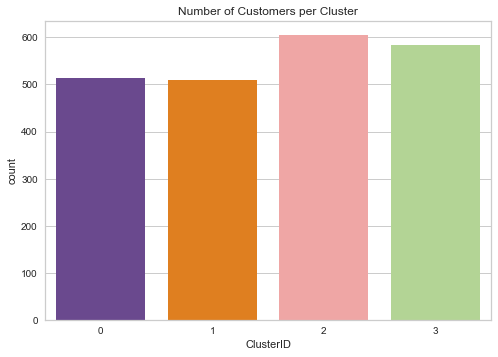

In [32]:
#Plotting countplot of clusters
pal = "Paired_r"
pl = sns.countplot(x=df_data["ClusterID"], palette=pal)
pl.set_title("Number of Customers per Cluster")
plt.show()

The clusters seem to be fairly distributed.

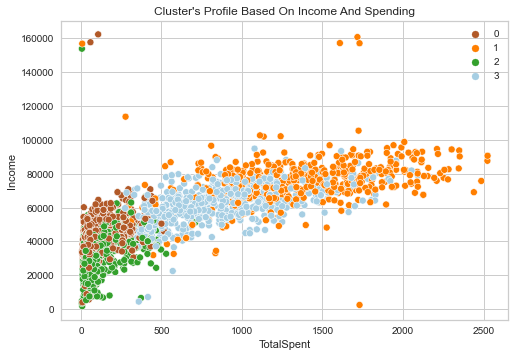

In [33]:
pl = sns.scatterplot(data = df_data,x=data["TotalSpent"], y=df_data["Income"],hue=df_data["ClusterID"], palette=pal )
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: low spending & middle income 
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: middle spending & middle income  

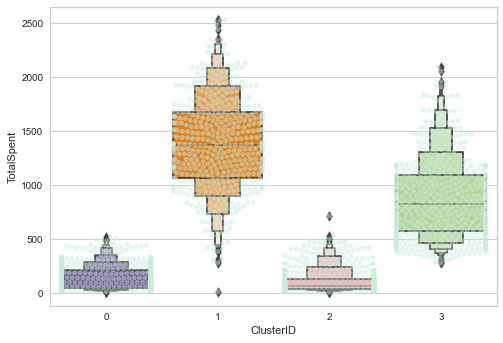

In [34]:
plt.figure()
pl=sns.swarmplot(x=df_data["ClusterID"], y=df_data["TotalSpent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_data["ClusterID"], y=df_data["TotalSpent"], palette=pal)
plt.show()


From the above plot, it can be clearly seen that customers from cluster 1 are biggest spenders followed by cluster 3.
We can explore what each cluster is spending on for the targeted marketing strategies.


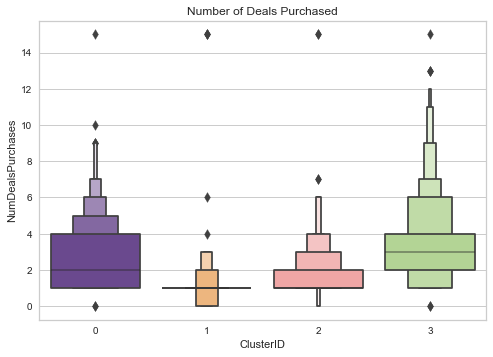

In [35]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df_data["NumDealsPurchases"],x=df_data["ClusterID"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

As can be seen, middle income groups (0 and 3) are much more interested in deals during shopping than others.
Not surprisingly, our high income customers (cluster 1) are not much into the deals. 
Low income customers seem to not be overwhelmingly attracted to deals as well.

# Profiling

All conclusions will be based on plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 

In [36]:
df_data['Education'] = df_data['Education'].apply(lambda x: "Graduate" if 'Graduation' in x else x)
df_data['Education'].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

In [37]:
df_data['Living_With'].value_counts()

Partner    1428
Alone       784
Name: Living_With, dtype: int64

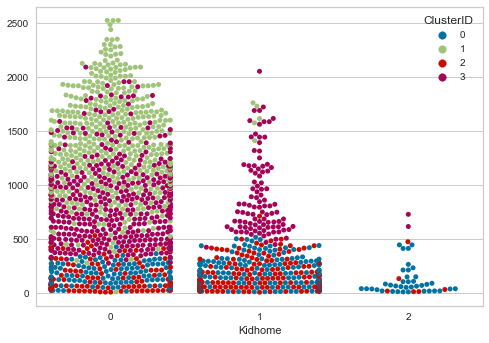

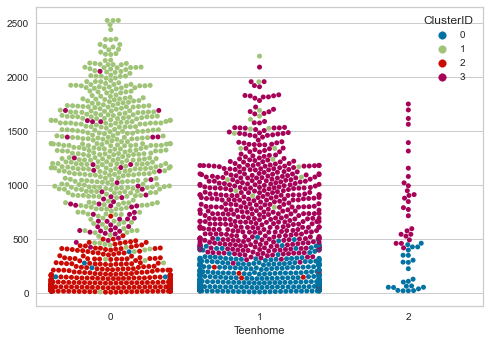

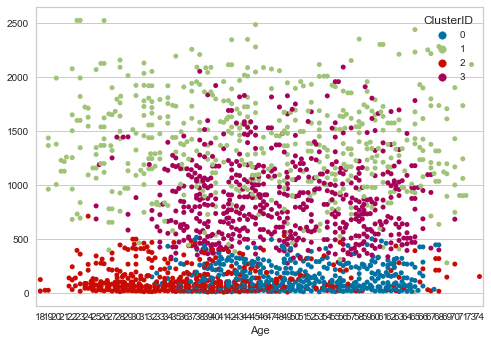

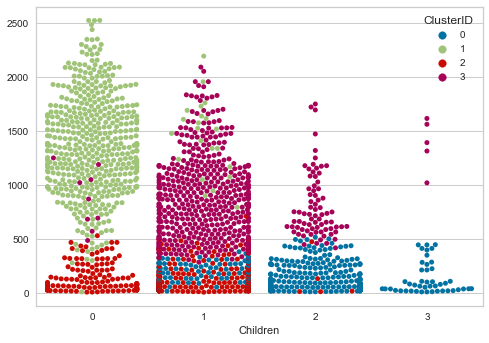

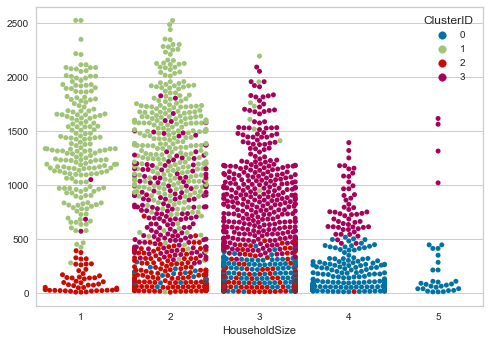

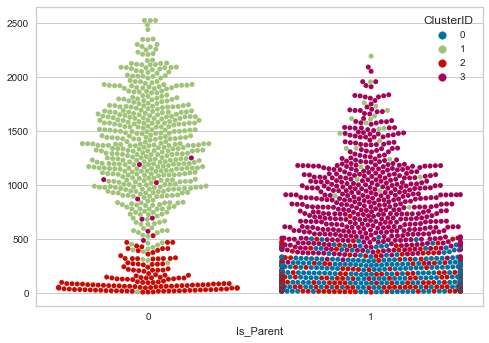

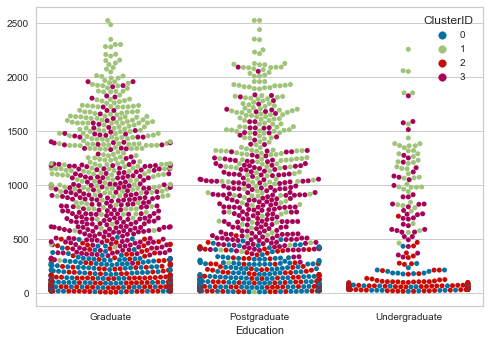

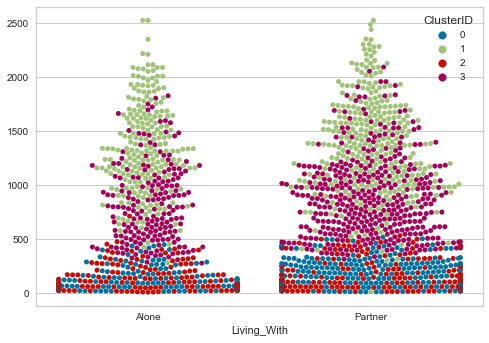

In [38]:
# characteristics
dimentions = [ "Kidhome","Teenhome", "Age", "Children", "HouseholdSize", "Is_Parent", "Education","Living_With"]

for i in dimentions:
    plt.figure()
    ax = sns.swarmplot(data=df_data, x=i, y="TotalSpent", hue="ClusterID")
    ax.set(ylabel="")
    plt.show()


In [39]:
# product spending
columns = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']
df_data.groupby("ClusterID")[columns].describe().T

ClusterID              0            1           2            3
Wines  count  514.000000   510.000000  605.000000   583.000000
       mean    77.747082   605.662745   36.520661   522.042882
       std     81.023943   323.521178   55.288092   291.261204
       min      2.000000     1.000000    0.000000    16.000000
       25%     19.000000   353.250000    5.000000   305.500000
       50%     44.000000   562.500000   14.000000   462.000000
       75%    110.750000   829.000000   39.000000   674.500000
       max    456.000000  1493.000000  342.000000  1492.000000
Fruits count  514.000000   510.000000  605.000000   583.000000
       mean     4.029183    65.200000    6.704132    32.353345
       std      7.527281    50.965291    9.168767    37.310051
       min      0.000000     0.000000    0.000000     0.000000
       25%      0.000000    24.000000    1.000000     6.000000
       50%      1.000000    50.500000    4.000000    19.000000
       75%      5.000000   100.000000    8.000000    47.000000
       max     70.000000   197.000000   64.000000   199.000000
Meat   count  514.000000   510.000000  605.000000   583.000000
       mean    28.033074   469.980392   27.381818   169.476844
       std     28.771955   257.520350   32.763673   115.940213
       min      1.000000     2.000000    0.000000    12.000000
       25%      9.000000   273.500000    8.000000    83.000000
       50%     17.000000   431.000000   15.000000   140.000000
       75%     37.000000   638.000000   30.000000   226.000000
       max    171.000000  1725.000000  230.000000   650.000000
Fish   count  514.000000   510.000000  605.000000   583.000000
       mean     5.665370    96.082353   10.459504    42.945111
       std      9.354242    66.287143   17.394348    49.706877
       min      0.000000     0.000000    0.000000     0.000000
       25%      0.000000    40.000000    2.000000     8.000000
       50%      3.000000    83.000000    6.000000    23.000000
       75%      7.000000   146.000000   12.000000    62.000000
       max     72.000000   259.000000  179.000000   258.000000
Sweets count  514.000000   510.000000  605.000000   583.000000
       mean     3.943580    66.501961    6.990083    33.713551
       std      6.653403    52.094698    9.524797    40.119820
       min      0.000000     0.000000    0.000000     0.000000
       25%      0.000000    26.000000    1.000000     6.000000
       50%      1.500000    51.000000    4.000000    19.000000
       75%      5.000000    98.750000    9.000000    46.000000
       max     67.000000   262.000000   78.000000   195.000000
Gold   count  514.000000   510.000000  605.000000   583.000000
       mean    15.642023    73.986275   18.927273    68.507719
       std     18.108625    61.193803   25.978238    56.029259
       min      0.000000     0.000000    0.000000     0.000000
       25%      4.000000    29.000000    5.000000    26.500000
       50%      9.000000    53.000000   11.000000    50.000000
       75%     22.000000   108.000000   23.000000    98.500000
       max    152.000000   249.000000  262.000000   321.000000

In [40]:
# purchasing style 
places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

df_data.groupby("ClusterID")[places].describe().T

ClusterID                           0           1           2           3
NumWebPurchases     count  514.000000  510.000000  605.000000  583.000000
                    mean     2.490272    4.949020    2.274380    6.626072
                    std      1.599495    2.324667    1.549649    2.513361
                    min      0.000000    0.000000    0.000000    2.000000
                    25%      1.000000    3.000000    1.000000    5.000000
                    50%      2.000000    5.000000    2.000000    7.000000
                    75%      3.000000    6.000000    3.000000    8.000000
                    max      8.000000   27.000000   10.000000   25.000000
NumCatalogPurchases count  514.000000  510.000000  605.000000  583.000000
                    mean     0.778210    6.005882    0.543802    3.634648
                    std      0.890404    3.020227    0.786990    2.167068
                    min      0.000000    0.000000    0.000000    0.000000
                    25%      0.000000    4.000000    0.000000    2.000000
                    50%      1.000000    6.000000    0.000000    3.000000
                    75%      1.000000    7.000000    1.000000    5.000000
                    max      6.000000   28.000000    5.000000   11.000000
NumStorePurchases   count  514.000000  510.000000  605.000000  583.000000
                    mean     3.647860    8.243137    3.195041    8.288165
                    std      1.319565    2.877271    1.151579    2.724330
                    min      0.000000    0.000000    0.000000    0.000000
                    25%      3.000000    6.000000    3.000000    6.000000
                    50%      3.000000    8.000000    3.000000    8.000000
                    75%      4.000000   10.000000    4.000000   10.000000
                    max      9.000000   13.000000    8.000000   13.000000
NumWebVisitsMonth   count  514.000000  510.000000  605.000000  583.000000
                    mean     6.038911    2.643137    6.838017    5.457976
                    std      1.877964    1.736611    1.941242    1.882603
                    min      1.000000    0.000000    0.000000    0.000000
                    25%      5.000000    1.000000    6.000000    4.000000
                    50%      6.000000    2.000000    7.000000    5.000000
                    75%      7.000000    3.000000    8.000000    7.000000
                    max     20.000000    9.000000   20.000000    9.000000

# Observations


**Cluster 0**
* Low spending & middle income
* Parents with 1-3 children
* Have 1 teenager
* Age middle or older
* Looking for shopping deals

**Cluster 1**
* High spending & high income
* Don't have kids
* Are not interested in deals

**Cluster 2**
* Low spending & low income
* Have at most one young kid
* Age middle or younger
* Mainly single parent families

**Cluster 3**
* Middle spending & middle income
* Parents with 1 teenager
* Age middle or older